In [ ]:
!pip install pandas

In [ ]:
pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os

EXPLORATORY DATA ANALYSIS

In [59]:
#Importing the data
df= pd.read_excel("E:\\Course\\Aamir\\Ola\\OLA PROJECT\\OLA_DataSet.xlsx")

In [60]:
#getting the data
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


In [61]:
#STEP-1
# Getting an idea about the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       63967 non-null   float64       
 9   C_TAT                       63967 non-null   float64       
 10  Canceled_Rides_by_Customer  10499 non-null   object        
 11  Canceled_Rides_by_Driver    18434 non-n

In [ ]:
#All the columns are in appropriate data types except time it should be datetime.
# 

In [62]:
#STEP-2
# Getting statistics analysis for numerical columns
df.describe()

,Date,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,103024,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000
mean,2024-07-16 11:31:38.879678720,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313
min,2024-07-01 00:00:00,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000
25%,2024-07-08 18:41:00,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000
50%,2024-07-16 11:23:00,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000
75%,2024-07-24 05:18:00,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000
max,2024-07-31 23:58:00,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000
std,NaN,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957


In [ ]:
'''
Conclusions ->
1) From the datetime column we can see its an one month data from 1 july 2024 to 31 july 2024
2) V_TAT (Vehicle Turnaround Time) mean is greater than C_TAT (Customer Turnaround Time) mean, Only 63,967 out of 103,024 records have these values (62% non-null).
3) From Booking_value column median is much lower than mean, means there are outliers in right tail(right-skewed distribution (some high-value outliers))
4) From ride_distance column: Mean: 14.18 km, median: 8 km, max: 49 km
5) 0 km rides exist, which are likely cancellations or incomplete rides.
6) Driver_Ratings & Customer_Rating: min is 3 and max is 5, Suggesting 3 is probably the lowest rating.

'''

<Axes: title={'center': 'Rides Per Day'}, xlabel='Date'>

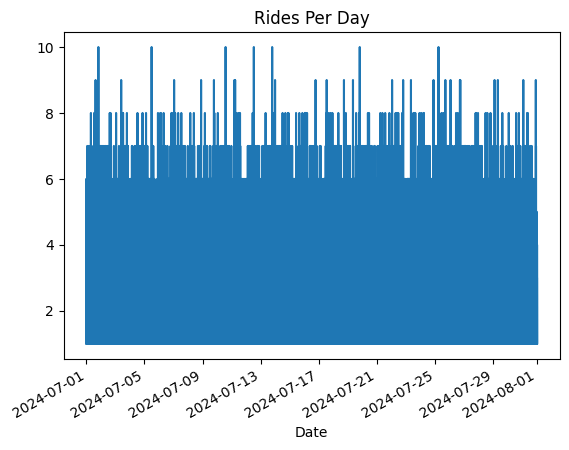

In [63]:
df['Date'].value_counts().sort_index().plot(kind='line', title='Rides Per Day')

Text(0.5, 1.0, 'Vehicle Turnaround Time Distribution')

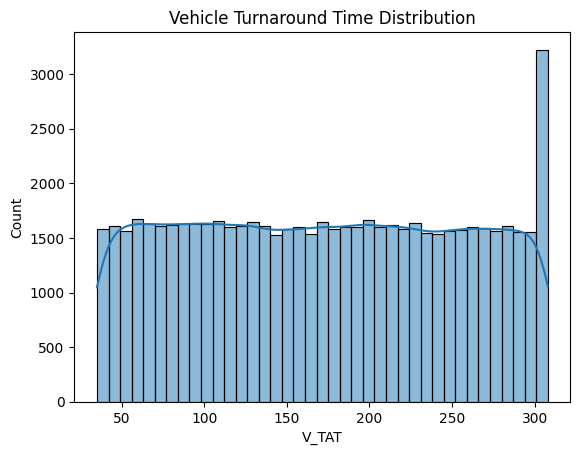

In [71]:
sns.histplot(df['V_TAT'].dropna(), kde=True)
plt.title('Vehicle Turnaround Time Distribution')

Text(0.5, 1.0, 'Customer Turnaround Time Distribution')

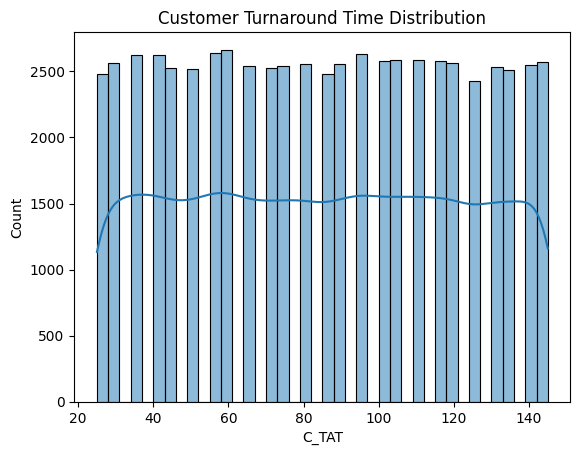

In [72]:
sns.histplot(df['C_TAT'].dropna(), kde=True)
plt.title('Customer Turnaround Time Distribution')

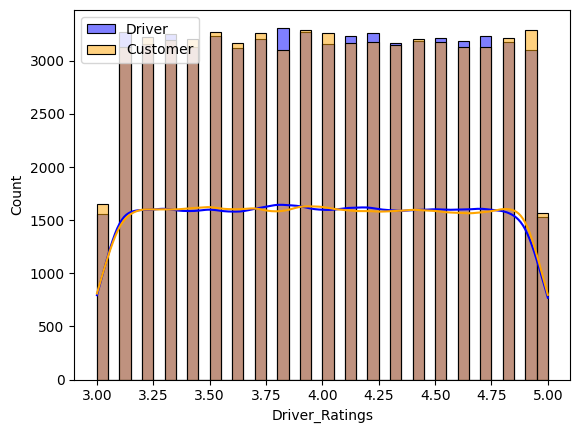

In [74]:
sns.histplot(df['Driver_Ratings'].dropna(), kde=True, color='blue', label='Driver')
sns.histplot(df['Customer_Rating'].dropna(), kde=True, color='orange', label='Customer')
plt.legend()

In [64]:
#STEP-3
# Getting the number of unique values
df[['Booking_ID', 'Customer_ID', 'Payment_Method', 'Booking_Status', 'Vehicle_Type', 'Incomplete_Rides_Reason']].nunique()

Booking_ID                 103024
Customer_ID                 94544
Payment_Method                  4
Booking_Status                  4
Vehicle_Type                    7
Incomplete_Rides_Reason         3
dtype: int64

In [ ]:
'''
1) From booking id and customer id, we can see many customers booked more than once
2) There are 4 types of payment methods accepted
3) There are 4 status, useful for segmentation e.g. completed/cancelled
4) There are multiple vehicle types
5) There are only three reasons logged for why rides were incomplete
'''

In [65]:
# Check the column names 
df.columns

Index(['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID',
       'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT',
       'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
       'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value',
       'Payment_Method', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating',
       'Vehicle Images'],
      dtype='object')

In [66]:
# Check unique values and frequency for categorical columns like ride status and payment method
print(df['Booking_Status'].value_counts())
print(df['Payment_Method'].value_counts())

Booking_Status
Success                 63967
Canceled by Driver      18434
Canceled by Customer    10499
Driver Not Found        10124
Name: count, dtype: int64
Payment_Method
Cash           35022
UPI            25881
Credit Card     2435
Debit Card       629
Name: count, dtype: int64


In [67]:
# checking vehicle types
print(df['Vehicle_Type'].value_counts())

Vehicle_Type
Prime Sedan    14877
eBike          14816
Auto           14755
Prime Plus     14707
Bike           14662
Prime SUV      14655
Mini           14552
Name: count, dtype: int64


In [68]:
#STEP-4
# Getting idea about null values
print(df.isnull().sum().any())

True


In [ ]:
#TRUE MEANS THERE ARE NULL VALUES IN THE DATA

In [18]:
# CHECKING NULL VALUES
print(df.isnull().sum())

Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
Incomplete_Rides              39057
Incomplete_Rides_Reason       99098
Booking_Value                     0
Payment_Method                39057
Ride_Distance                     0
Driver_Ratings                39057
Customer_Rating               39057
Vehicle Images                    0
Datetime                          0
dtype: int64


In [ ]:
'''
1) V_TAT, C_TAT, Incomplete_Rides, Driver_Ratings, Customer_Rating, Payment_Method, having same(39057) missing values.
2) Canceled_Rides_by_Customer has 92,525 and Canceled_Rides_by_Driver has 84,590 mssing values
3) Incomplete_Rides_Reason= 99,098

THERE ARE 2 METHODS TO DEAL WITH NULL VALUES --> REMOVAL AND IMPUTATION


'''

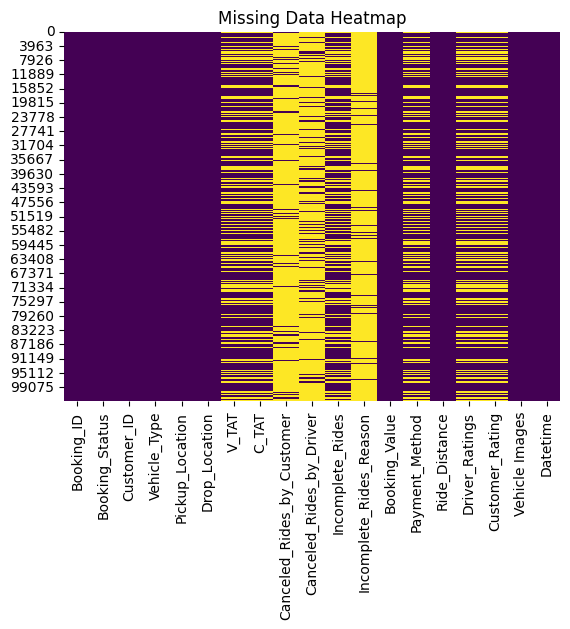

In [19]:
# Visualize missing data with a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [69]:
# Checking if missing values in 'Incomplete_Rides_Reason' correspond to non-incomplete bookings
df[df['Incomplete_Rides_Reason'].isnull()]['Booking_Status'].value_counts()

Booking_Status
Success                 60041
Canceled by Driver      18434
Canceled by Customer    10499
Driver Not Found        10124
Name: count, dtype: int64

In [ ]:
#Most of the 39,057 missing values in columns like V_TAT, C_TAT, Driver_Ratings, Payment_Method, etc., line up exactly with non-successful bookings.
#So, those values are only present for successful rides, and missing for canceled/incomplete ones.
#These nulls are not missing at random—they're missing by design
#So, Keeping the Missing Values As-Is for analysis 

In [70]:
#STEP 5 --> Checking Duplicates in the data
df.duplicated().sum()

np.int64(0)

In [ ]:
'''
0 indicates that there no duplicates in the data

'''

In [ ]:
# KPIs 

In [25]:
#Total Bookings
df.shape[0]

103024

In [28]:
print(df['Booking_ID'].count())

103024


In [41]:
#STEP 6: CORRELATION ANALYSIS(PEARSONS CORRELATION COEFFICIENT)
df.corr(numeric_only=True)

,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
V_TAT,1.000000,0.000249,-0.003671,-0.011204,-0.002300,0.000574
C_TAT,0.000249,1.000000,-0.004443,0.000074,-0.002815,0.001015
Booking_Value,-0.003671,-0.004443,1.000000,0.000492,-0.001327,0.006231
Ride_Distance,-0.011204,0.000074,0.000492,1.000000,-0.007235,0.009871
Driver_Ratings,-0.002300,-0.002815,-0.001327,-0.007235,1.000000,-0.002807
Customer_Rating,0.000574,0.001015,0.006231,0.009871,-0.002807,1.000000


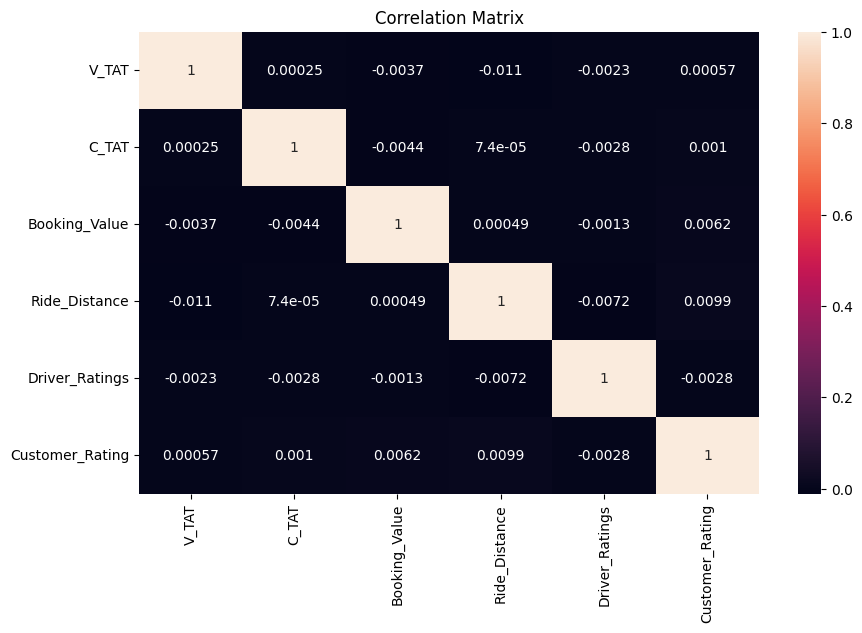

In [46]:
#plot heatmap for correlation
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Step - 7
#Getting the proportion of the values
df['Booking_Status'].value_counts(normalize=True) * 100

Booking_Status
Success                 62.089416
Canceled by Driver      17.892918
Canceled by Customer    10.190829
Driver Not Found         9.826836
Name: proportion, dtype: float64

In [ ]:
#From above value we can see that only 62 percent of all the bookings were successful

In [74]:
df['Payment_Method'].value_counts(normalize=True) * 100

Payment_Method
Cash           54.750106
UPI            40.459925
Credit Card     3.806650
Debit Card      0.983320
Name: proportion, dtype: float64

In [ ]:
#we can see that most payment has been done by cash (54.75%) and UPI (40.45%)

In [72]:
df.columns

Index(['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID',
       'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT',
       'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
       'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value',
       'Payment_Method', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating',
       'Vehicle Images'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Booking_ID                  103024 non-null  object 
 1   Booking_Status              103024 non-null  object 
 2   Customer_ID                 103024 non-null  object 
 3   Vehicle_Type                103024 non-null  object 
 4   Pickup_Location             103024 non-null  object 
 5   Drop_Location               103024 non-null  object 
 6   V_TAT                       63967 non-null   float64
 7   C_TAT                       63967 non-null   float64
 8   Canceled_Rides_by_Customer  10499 non-null   object 
 9   Canceled_Rides_by_Driver    18434 non-null   object 
 10  Incomplete_Rides            63967 non-null   object 
 11  Incomplete_Rides_Reason     3926 non-null    object 
 12  Booking_Value               103024 non-null  int64  
 13  Payment_Method

DATA VISUALIZATION

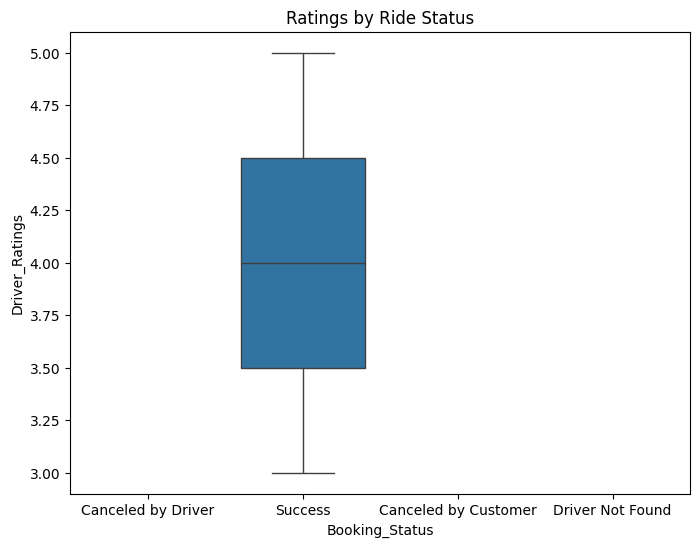

In [75]:
# Boxplot to compare ratings by ride status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Booking_Status', y='Driver_Ratings', data=df)
plt.title('Ratings by Ride Status')
plt.show()

In [ ]:
''' 
WE CAN SEE FROM THE PLOT THAT RATINGS ARE DISTRIBUTED ONLY ON SUCCESSFUL RIDES RANGING FROM 3.50 TO 4.50
'''

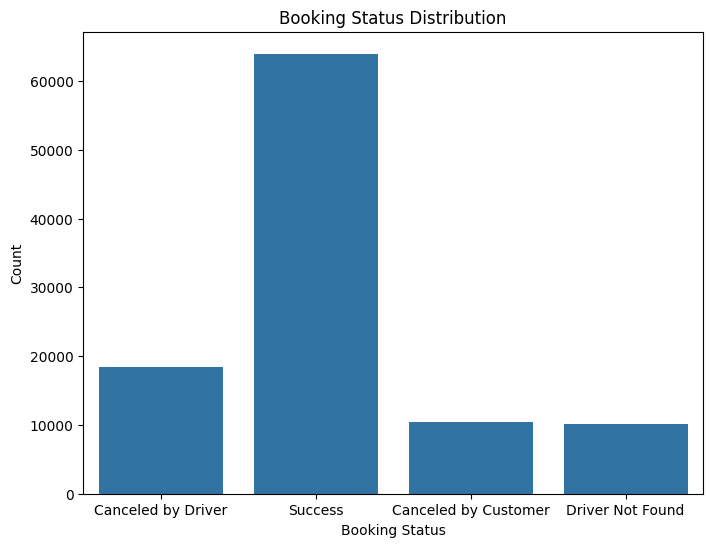

In [56]:
#Analyzing key variables
# Booking Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Booking_Status', data=df)
plt.title('Booking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

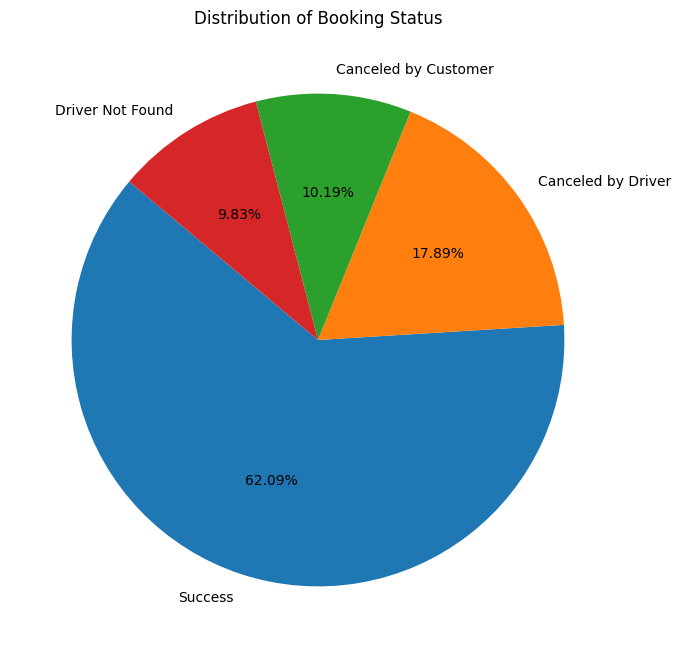

In [87]:
# Booking Status Distribution
# Plot pie chart
status_counts = df['Booking_Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%.2f%%', startangle=140)
plt.title('Distribution of Booking Status')
plt.show()

In [ ]:
'''
1) Majority of the bookings were successful
2) Canceled by Customer and Driver Not Found, have significantly lower counts, but still represent a noticeable portion of the failed bookings.
'''

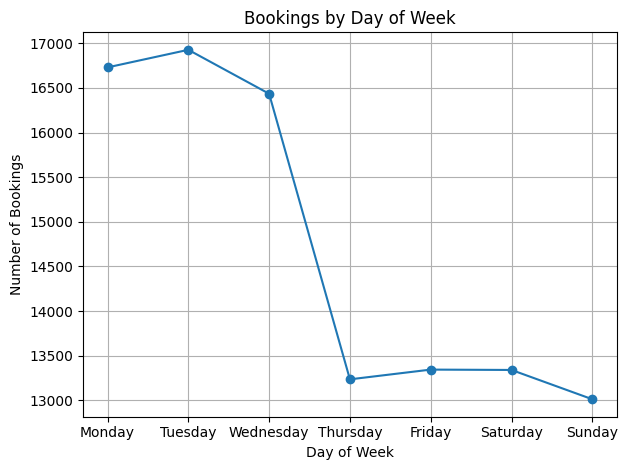

In [ ]:
# Create 'day_of_week' column 
df['day_of_week'] = df['Date'].dt.day_name()

# Group and count bookings by day
day_counts = df['day_of_week'].value_counts().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])

# Plot
day_counts.plot(kind='line', marker='o')
plt.title('Bookings by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#From the above plot we can see that the number of bookings decreases on weekends

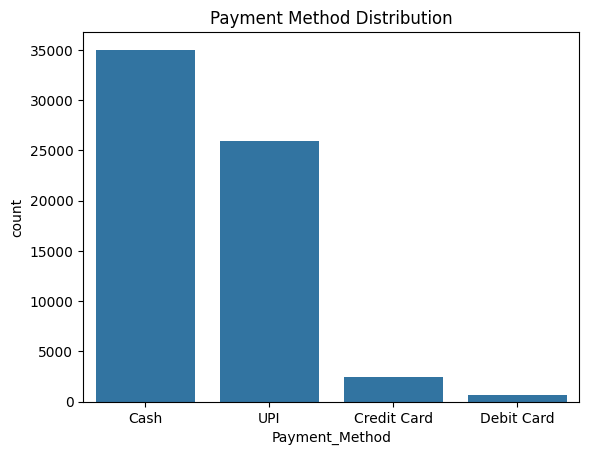

In [34]:
# Payment Method Distribution
sns.countplot(x='Payment_Method', data=df)
plt.title('Payment Method Distribution')
plt.show()

In [ ]:
'''
1) Most used payment method is cash and UPI after that.
2) While the least used payment methods are credit card followed by debit card
'''

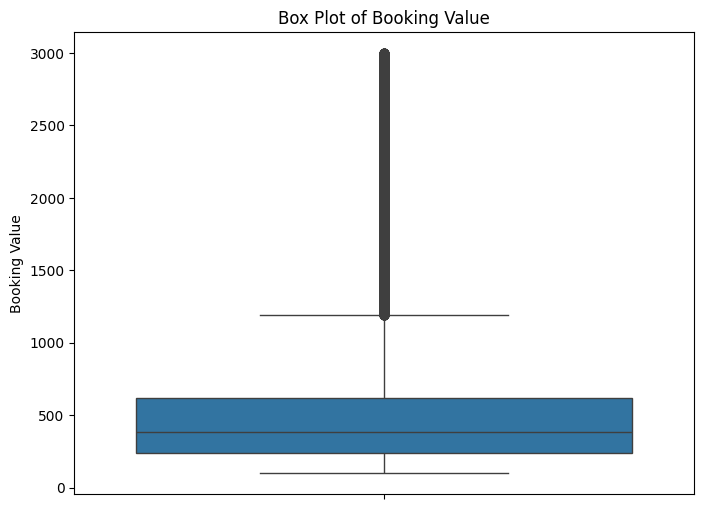

In [77]:
#Boxplot for the Booking value
# Set figure size
plt.figure(figsize=(8, 6))

# Create a box plot for Booking_Value
sns.boxplot(y='Booking_Value', data=df)

# Add title and axis label
plt.title('Box Plot of Booking Value')
plt.ylabel('Booking Value')

# Show the plot
plt.show()


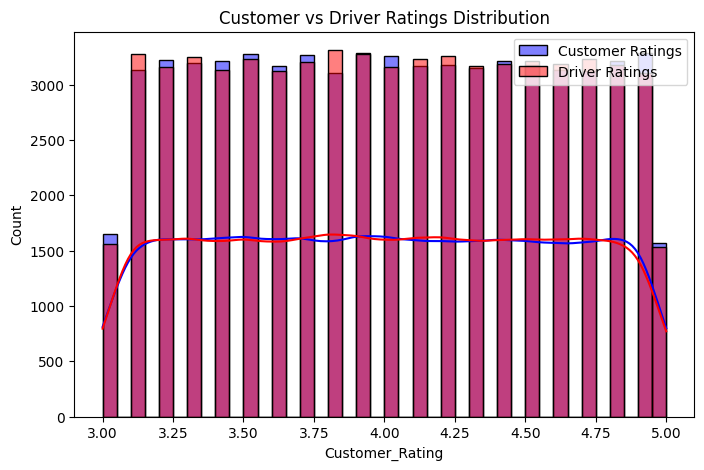

In [38]:
# Distribution of Ratings
# Set the plot size
plt.figure(figsize=(8, 5))  # Adjust size if needed

# Plot both histograms on the same plot
sns.histplot(df['Customer_Rating'], kde=True, color='blue', label='Customer Ratings')
sns.histplot(df['Driver_Ratings'], kde=True, color='red', label='Driver Ratings')

# Add legend and title
plt.legend()
plt.title('Customer vs Driver Ratings Distribution')

# Show the plot
plt.show()

In [ ]:
'''
Most ratings (both Customer and Driver) are between 3.5 and 4.8, with very few near 3.0 or 5.0.

'''

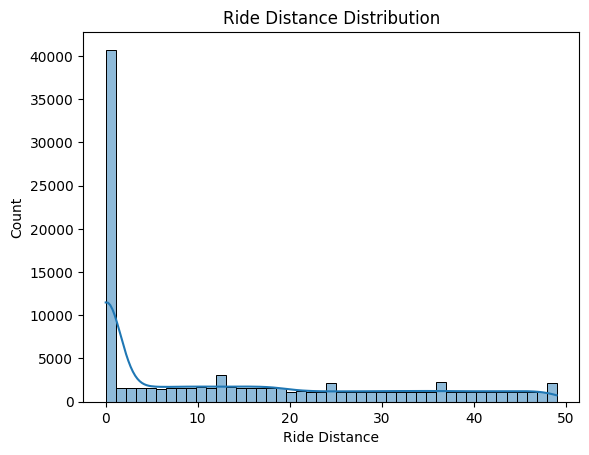

In [63]:
# Distribution of Ride Distance
sns.histplot(df['Ride_Distance'], kde=True)
plt.title('Ride Distance Distribution')
plt.xlabel('Ride Distance')
plt.ylabel('Count')
plt.show()

In [ ]:
#from the histogram plot we can see that most people take short trips, longer rides are rare

In [36]:
df.columns

Index(['Booking_ID', 'Booking_Status', 'Customer_ID', 'Vehicle_Type',
       'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT',
       'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
       'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value',
       'Payment_Method', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating',
       'Vehicle Images'],
      dtype='object')

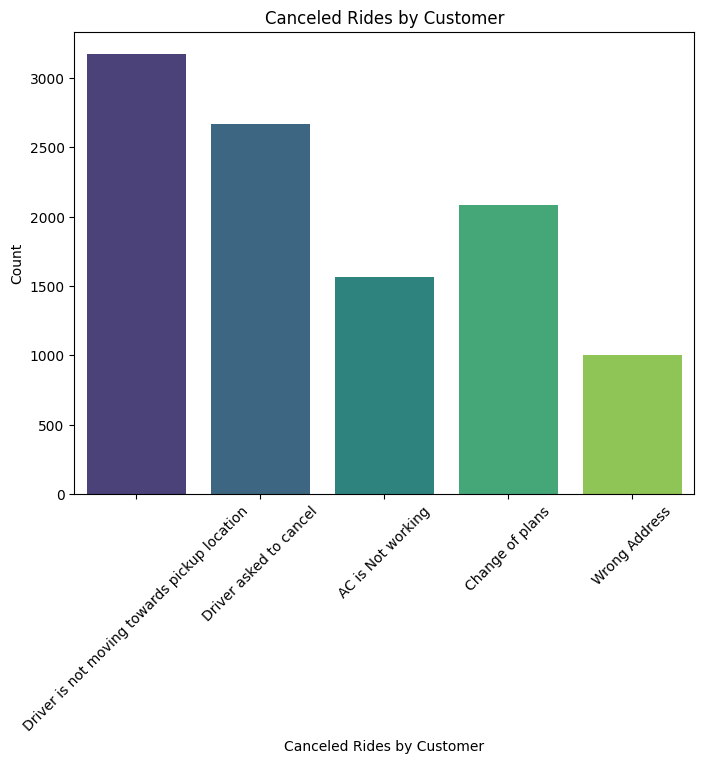

In [54]:
#Cancellation Analysis
# Canceled Rides by Customer
# Create the countplot

plt.figure(figsize=(8, 6))
sns.countplot(x='Canceled_Rides_by_Customer', data=df, palette='viridis')
plt.title('Canceled Rides by Customer')
plt.xlabel('Canceled Rides by Customer')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()



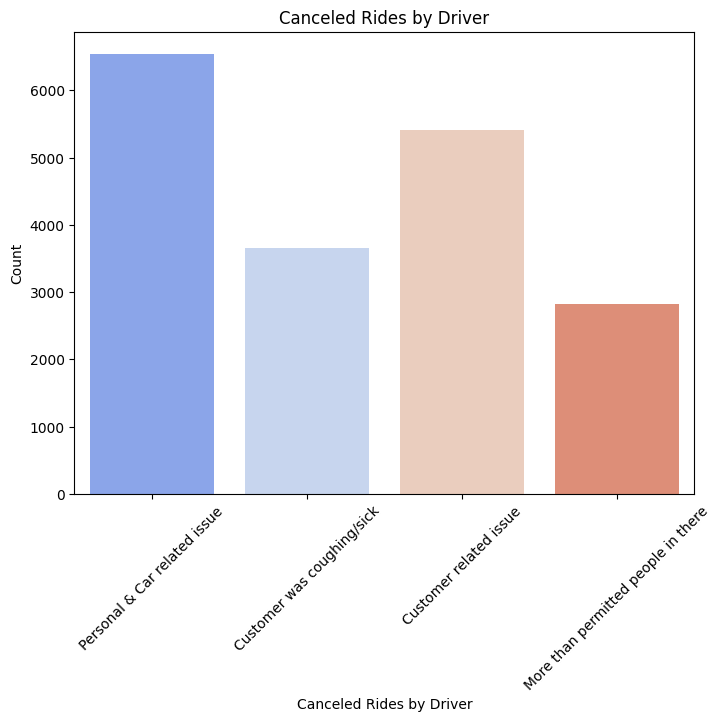

In [50]:
# Canceled Rides by Driver
plt.figure(figsize=(8, 6))
sns.countplot(x='Canceled_Rides_by_Driver', data=df, palette='coolwarm')
plt.title('Canceled Rides by Driver')
plt.xlabel('Canceled Rides by Driver')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

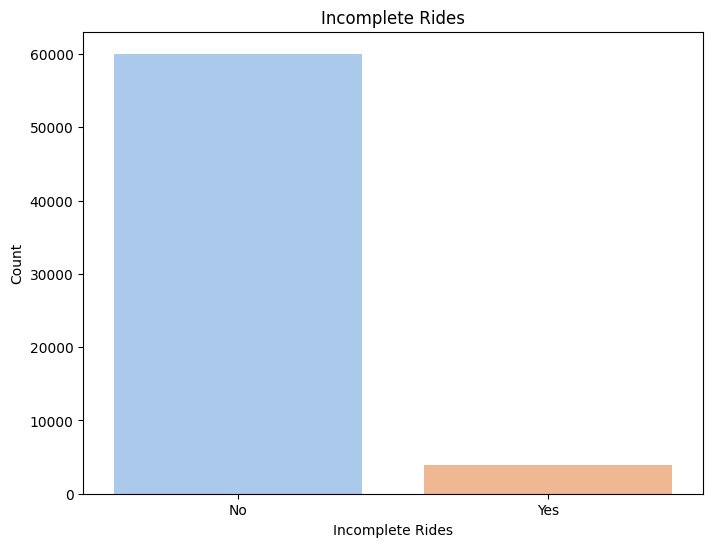

In [54]:
# Incomplete Rides Count

plt.figure(figsize=(8, 6))
sns.countplot(x='Incomplete_Rides', data=df, palette='pastel')
plt.title('Incomplete Rides')
plt.xlabel('Incomplete Rides')
plt.ylabel('Count')
plt.show()

In [67]:
df.groupby('Incomplete_Rides')['Booking_Value'].mean()

Incomplete_Rides
No     546.792775
Yes    573.225166
Name: Booking_Value, dtype: float64

In [59]:
# Check the exact count of incomplete rides
incomplete_ride_counts = df['Incomplete_Rides'].value_counts()
print("Incomplete Ride Counts:", incomplete_ride_counts)

Incomplete Ride Counts: Incomplete_Rides
No     60041
Yes     3926
Name: count, dtype: int64


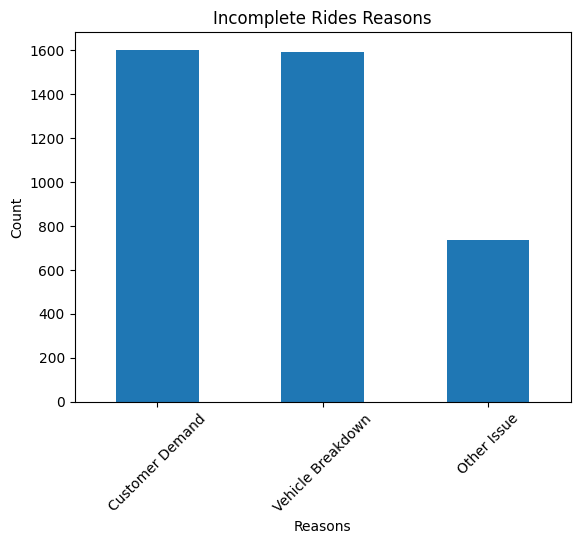

In [64]:
# Reasons for Incomplete Rides
df['Incomplete_Rides_Reason'].value_counts().plot(kind='bar')
plt.title('Incomplete Rides Reasons')
plt.xlabel('Reasons')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       63967 non-null   float64       
 9   C_TAT                       63967 non-null   float64       
 10  Canceled_Rides_by_Customer  10499 non-null   object        
 11  Canceled_Rides_by_Driver    18434 non-n